# Implementing a Neural Network using Keras

## Importing libraries

In [122]:
#import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

I'm using the iris flowers dataset in scikit learn

In [124]:
from sklearn.datasets import load_iris
iris_data = load_iris()


from sklearn.model_selection import train_test_split

## Extracting the data

In [125]:
data = np.column_stack((iris_data.data,iris_data.target.T)) #Joins the 4 features and the target variable which is encoded as 0,1,2 for setosa, versicolour and virginica

In [126]:
np.random.shuffle(data)#shuffle it since the data is arranged by class

## Splitting the data into training and testing data

In [127]:
training, testing=train_test_split(data, test_size=0.2, train_size=0.8, random_state=43, shuffle=True, stratify=None)
X_train = np.array([i[:4] for i in training])
y_train = np.array([i[4] for i in training])
X_test = np.array([i[:4] for i in testing])
y_test = np.array([i[4] for i in testing])


## Normalising the prediction features and converting the data into tensors

In [128]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train=tf.convert_to_tensor(X_train)
X_test=tf.convert_to_tensor(X_test)
y_train=tf.convert_to_tensor(y_train)
y_test=tf.convert_to_tensor(y_test)

## Creating the model and compiling it 
The model takes has an input layer which takes 4 inputs, a hidden layer with 5 neurons, and an output layer with 3 neurons.

The activation function for the first and second layers is the hyperbolic tangent function, whereas for the last layer it is a softmax function, since our problem is a multinomial classification problem.

In [129]:
model = keras.Sequential(
    [
        keras.Input(shape=(4)),
        layers.Dense(4, activation="tanh"),
        layers.Dense(5, activation="tanh"),
        #layers.Dense(256, activation="relu"),
        layers.Dense(3,activation="softmax"),
    ]
    
)

### Adam optimiser
Defines the learning rate as 0.001, along with some other parameters
### SparseCategoricalCrossentropy
Use this crossentropy loss function when there are two or more label classes. We expect labels to be provided as integers.

This defines the loss function, for classification we use cross entropy functions whereas for regression we use mean squared error functions.

In [130]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)


## Fitting and testing the model

In [131]:
model.fit(X_train, y_train, batch_size=10, epochs=1000, verbose=2)
model.evaluate(X_test, y_test, batch_size=5, verbose=2)

Epoch 1/1000
12/12 - 0s - loss: 1.3065 - accuracy: 0.3250 - 179ms/epoch - 15ms/step
Epoch 2/1000
12/12 - 0s - loss: 1.2403 - accuracy: 0.3667 - 6ms/epoch - 522us/step
Epoch 3/1000
12/12 - 0s - loss: 1.1794 - accuracy: 0.4333 - 7ms/epoch - 594us/step
Epoch 4/1000
12/12 - 0s - loss: 1.1298 - accuracy: 0.4833 - 9ms/epoch - 729us/step
Epoch 5/1000
12/12 - 0s - loss: 1.0861 - accuracy: 0.5417 - 7ms/epoch - 556us/step
Epoch 6/1000
12/12 - 0s - loss: 1.0480 - accuracy: 0.5917 - 7ms/epoch - 612us/step
Epoch 7/1000
12/12 - 0s - loss: 1.0139 - accuracy: 0.6500 - 8ms/epoch - 633us/step
Epoch 8/1000
12/12 - 0s - loss: 0.9822 - accuracy: 0.6750 - 9ms/epoch - 739us/step
Epoch 9/1000
12/12 - 0s - loss: 0.9555 - accuracy: 0.7250 - 7ms/epoch - 574us/step
Epoch 10/1000
12/12 - 0s - loss: 0.9281 - accuracy: 0.7667 - 7ms/epoch - 571us/step
Epoch 11/1000
12/12 - 0s - loss: 0.9041 - accuracy: 0.7833 - 9ms/epoch - 711us/step
Epoch 12/1000
12/12 - 0s - loss: 0.8803 - accuracy: 0.7833 - 7ms/epoch - 620us/step


Epoch 99/1000
12/12 - 0s - loss: 0.2890 - accuracy: 0.9333 - 7ms/epoch - 594us/step
Epoch 100/1000
12/12 - 0s - loss: 0.2848 - accuracy: 0.9333 - 7ms/epoch - 544us/step
Epoch 101/1000
12/12 - 0s - loss: 0.2811 - accuracy: 0.9333 - 7ms/epoch - 545us/step
Epoch 102/1000
12/12 - 0s - loss: 0.2764 - accuracy: 0.9333 - 6ms/epoch - 514us/step
Epoch 103/1000
12/12 - 0s - loss: 0.2720 - accuracy: 0.9417 - 6ms/epoch - 525us/step
Epoch 104/1000
12/12 - 0s - loss: 0.2676 - accuracy: 0.9417 - 6ms/epoch - 530us/step
Epoch 105/1000
12/12 - 0s - loss: 0.2632 - accuracy: 0.9417 - 6ms/epoch - 524us/step
Epoch 106/1000
12/12 - 0s - loss: 0.2590 - accuracy: 0.9417 - 7ms/epoch - 547us/step
Epoch 107/1000
12/12 - 0s - loss: 0.2552 - accuracy: 0.9417 - 7ms/epoch - 556us/step
Epoch 108/1000
12/12 - 0s - loss: 0.2506 - accuracy: 0.9417 - 6ms/epoch - 530us/step
Epoch 109/1000
12/12 - 0s - loss: 0.2463 - accuracy: 0.9417 - 6ms/epoch - 541us/step
Epoch 110/1000
12/12 - 0s - loss: 0.2417 - accuracy: 0.9500 - 6ms/

Epoch 196/1000
12/12 - 0s - loss: 0.0805 - accuracy: 0.9750 - 6ms/epoch - 536us/step
Epoch 197/1000
12/12 - 0s - loss: 0.0800 - accuracy: 0.9667 - 6ms/epoch - 527us/step
Epoch 198/1000
12/12 - 0s - loss: 0.0794 - accuracy: 0.9667 - 6ms/epoch - 530us/step
Epoch 199/1000
12/12 - 0s - loss: 0.0791 - accuracy: 0.9667 - 6ms/epoch - 533us/step
Epoch 200/1000
12/12 - 0s - loss: 0.0786 - accuracy: 0.9750 - 6ms/epoch - 518us/step
Epoch 201/1000
12/12 - 0s - loss: 0.0781 - accuracy: 0.9750 - 6ms/epoch - 539us/step
Epoch 202/1000
12/12 - 0s - loss: 0.0774 - accuracy: 0.9750 - 6ms/epoch - 535us/step
Epoch 203/1000
12/12 - 0s - loss: 0.0773 - accuracy: 0.9667 - 7ms/epoch - 556us/step
Epoch 204/1000
12/12 - 0s - loss: 0.0768 - accuracy: 0.9667 - 7ms/epoch - 577us/step
Epoch 205/1000
12/12 - 0s - loss: 0.0762 - accuracy: 0.9750 - 6ms/epoch - 530us/step
Epoch 206/1000
12/12 - 0s - loss: 0.0758 - accuracy: 0.9750 - 6ms/epoch - 515us/step
Epoch 207/1000
12/12 - 0s - loss: 0.0751 - accuracy: 0.9750 - 7ms

Epoch 293/1000
12/12 - 0s - loss: 0.0542 - accuracy: 0.9833 - 7ms/epoch - 558us/step
Epoch 294/1000
12/12 - 0s - loss: 0.0546 - accuracy: 0.9833 - 7ms/epoch - 553us/step
Epoch 295/1000
12/12 - 0s - loss: 0.0545 - accuracy: 0.9833 - 6ms/epoch - 520us/step
Epoch 296/1000
12/12 - 0s - loss: 0.0538 - accuracy: 0.9833 - 7ms/epoch - 546us/step
Epoch 297/1000
12/12 - 0s - loss: 0.0538 - accuracy: 0.9833 - 6ms/epoch - 527us/step
Epoch 298/1000
12/12 - 0s - loss: 0.0535 - accuracy: 0.9833 - 6ms/epoch - 520us/step
Epoch 299/1000
12/12 - 0s - loss: 0.0537 - accuracy: 0.9833 - 6ms/epoch - 506us/step
Epoch 300/1000
12/12 - 0s - loss: 0.0532 - accuracy: 0.9833 - 6ms/epoch - 510us/step
Epoch 301/1000
12/12 - 0s - loss: 0.0538 - accuracy: 0.9833 - 6ms/epoch - 519us/step
Epoch 302/1000
12/12 - 0s - loss: 0.0545 - accuracy: 0.9833 - 6ms/epoch - 531us/step
Epoch 303/1000
12/12 - 0s - loss: 0.0529 - accuracy: 0.9833 - 6ms/epoch - 520us/step
Epoch 304/1000
12/12 - 0s - loss: 0.0532 - accuracy: 0.9833 - 7ms

Epoch 390/1000
12/12 - 0s - loss: 0.0463 - accuracy: 0.9833 - 7ms/epoch - 618us/step
Epoch 391/1000
12/12 - 0s - loss: 0.0463 - accuracy: 0.9833 - 6ms/epoch - 530us/step
Epoch 392/1000
12/12 - 0s - loss: 0.0463 - accuracy: 0.9833 - 6ms/epoch - 537us/step
Epoch 393/1000
12/12 - 0s - loss: 0.0464 - accuracy: 0.9833 - 6ms/epoch - 512us/step
Epoch 394/1000
12/12 - 0s - loss: 0.0460 - accuracy: 0.9833 - 7ms/epoch - 578us/step
Epoch 395/1000
12/12 - 0s - loss: 0.0461 - accuracy: 0.9833 - 7ms/epoch - 557us/step
Epoch 396/1000
12/12 - 0s - loss: 0.0462 - accuracy: 0.9833 - 6ms/epoch - 534us/step
Epoch 397/1000
12/12 - 0s - loss: 0.0459 - accuracy: 0.9833 - 6ms/epoch - 539us/step
Epoch 398/1000
12/12 - 0s - loss: 0.0458 - accuracy: 0.9833 - 6ms/epoch - 538us/step
Epoch 399/1000
12/12 - 0s - loss: 0.0459 - accuracy: 0.9833 - 7ms/epoch - 554us/step
Epoch 400/1000
12/12 - 0s - loss: 0.0460 - accuracy: 0.9833 - 6ms/epoch - 540us/step
Epoch 401/1000
12/12 - 0s - loss: 0.0457 - accuracy: 0.9833 - 6ms

Epoch 487/1000
12/12 - 0s - loss: 0.0425 - accuracy: 0.9833 - 7ms/epoch - 561us/step
Epoch 488/1000
12/12 - 0s - loss: 0.0429 - accuracy: 0.9833 - 7ms/epoch - 572us/step
Epoch 489/1000
12/12 - 0s - loss: 0.0427 - accuracy: 0.9833 - 7ms/epoch - 572us/step
Epoch 490/1000
12/12 - 0s - loss: 0.0426 - accuracy: 0.9833 - 6ms/epoch - 533us/step
Epoch 491/1000
12/12 - 0s - loss: 0.0426 - accuracy: 0.9833 - 7ms/epoch - 547us/step
Epoch 492/1000
12/12 - 0s - loss: 0.0424 - accuracy: 0.9833 - 6ms/epoch - 534us/step
Epoch 493/1000
12/12 - 0s - loss: 0.0429 - accuracy: 0.9833 - 7ms/epoch - 561us/step
Epoch 494/1000
12/12 - 0s - loss: 0.0428 - accuracy: 0.9833 - 6ms/epoch - 522us/step
Epoch 495/1000
12/12 - 0s - loss: 0.0426 - accuracy: 0.9833 - 7ms/epoch - 543us/step
Epoch 496/1000
12/12 - 0s - loss: 0.0429 - accuracy: 0.9833 - 7ms/epoch - 546us/step
Epoch 497/1000
12/12 - 0s - loss: 0.0422 - accuracy: 0.9833 - 7ms/epoch - 543us/step
Epoch 498/1000
12/12 - 0s - loss: 0.0423 - accuracy: 0.9833 - 6ms

Epoch 584/1000
12/12 - 0s - loss: 0.0406 - accuracy: 0.9833 - 6ms/epoch - 529us/step
Epoch 585/1000
12/12 - 0s - loss: 0.0409 - accuracy: 0.9833 - 7ms/epoch - 579us/step
Epoch 586/1000
12/12 - 0s - loss: 0.0407 - accuracy: 0.9833 - 7ms/epoch - 568us/step
Epoch 587/1000
12/12 - 0s - loss: 0.0407 - accuracy: 0.9833 - 6ms/epoch - 537us/step
Epoch 588/1000
12/12 - 0s - loss: 0.0407 - accuracy: 0.9833 - 6ms/epoch - 533us/step
Epoch 589/1000
12/12 - 0s - loss: 0.0407 - accuracy: 0.9833 - 6ms/epoch - 536us/step
Epoch 590/1000
12/12 - 0s - loss: 0.0407 - accuracy: 0.9833 - 6ms/epoch - 530us/step
Epoch 591/1000
12/12 - 0s - loss: 0.0408 - accuracy: 0.9833 - 7ms/epoch - 545us/step
Epoch 592/1000
12/12 - 0s - loss: 0.0408 - accuracy: 0.9833 - 7ms/epoch - 599us/step
Epoch 593/1000
12/12 - 0s - loss: 0.0404 - accuracy: 0.9833 - 7ms/epoch - 555us/step
Epoch 594/1000
12/12 - 0s - loss: 0.0408 - accuracy: 0.9833 - 6ms/epoch - 541us/step
Epoch 595/1000
12/12 - 0s - loss: 0.0415 - accuracy: 0.9833 - 7ms

Epoch 681/1000
12/12 - 0s - loss: 0.0394 - accuracy: 0.9833 - 7ms/epoch - 553us/step
Epoch 682/1000
12/12 - 0s - loss: 0.0402 - accuracy: 0.9833 - 7ms/epoch - 548us/step
Epoch 683/1000
12/12 - 0s - loss: 0.0400 - accuracy: 0.9833 - 6ms/epoch - 512us/step
Epoch 684/1000
12/12 - 0s - loss: 0.0396 - accuracy: 0.9833 - 6ms/epoch - 508us/step
Epoch 685/1000
12/12 - 0s - loss: 0.0398 - accuracy: 0.9833 - 6ms/epoch - 536us/step
Epoch 686/1000
12/12 - 0s - loss: 0.0399 - accuracy: 0.9833 - 7ms/epoch - 558us/step
Epoch 687/1000
12/12 - 0s - loss: 0.0395 - accuracy: 0.9833 - 7ms/epoch - 564us/step
Epoch 688/1000
12/12 - 0s - loss: 0.0396 - accuracy: 0.9833 - 6ms/epoch - 533us/step
Epoch 689/1000
12/12 - 0s - loss: 0.0405 - accuracy: 0.9833 - 7ms/epoch - 576us/step
Epoch 690/1000
12/12 - 0s - loss: 0.0405 - accuracy: 0.9833 - 6ms/epoch - 532us/step
Epoch 691/1000
12/12 - 0s - loss: 0.0397 - accuracy: 0.9833 - 6ms/epoch - 524us/step
Epoch 692/1000
12/12 - 0s - loss: 0.0393 - accuracy: 0.9833 - 6ms

Epoch 778/1000
12/12 - 0s - loss: 0.0385 - accuracy: 0.9833 - 6ms/epoch - 535us/step
Epoch 779/1000
12/12 - 0s - loss: 0.0387 - accuracy: 0.9833 - 6ms/epoch - 528us/step
Epoch 780/1000
12/12 - 0s - loss: 0.0384 - accuracy: 0.9833 - 7ms/epoch - 558us/step
Epoch 781/1000
12/12 - 0s - loss: 0.0386 - accuracy: 0.9833 - 6ms/epoch - 518us/step
Epoch 782/1000
12/12 - 0s - loss: 0.0384 - accuracy: 0.9833 - 6ms/epoch - 532us/step
Epoch 783/1000
12/12 - 0s - loss: 0.0384 - accuracy: 0.9833 - 7ms/epoch - 554us/step
Epoch 784/1000
12/12 - 0s - loss: 0.0390 - accuracy: 0.9833 - 7ms/epoch - 592us/step
Epoch 785/1000
12/12 - 0s - loss: 0.0382 - accuracy: 0.9833 - 7ms/epoch - 571us/step
Epoch 786/1000
12/12 - 0s - loss: 0.0385 - accuracy: 0.9833 - 7ms/epoch - 546us/step
Epoch 787/1000
12/12 - 0s - loss: 0.0386 - accuracy: 0.9833 - 7ms/epoch - 548us/step
Epoch 788/1000
12/12 - 0s - loss: 0.0384 - accuracy: 0.9833 - 6ms/epoch - 517us/step
Epoch 789/1000
12/12 - 0s - loss: 0.0386 - accuracy: 0.9833 - 6ms

Epoch 875/1000
12/12 - 0s - loss: 0.0374 - accuracy: 0.9833 - 6ms/epoch - 535us/step
Epoch 876/1000
12/12 - 0s - loss: 0.0372 - accuracy: 0.9833 - 6ms/epoch - 534us/step
Epoch 877/1000
12/12 - 0s - loss: 0.0373 - accuracy: 0.9833 - 6ms/epoch - 525us/step
Epoch 878/1000
12/12 - 0s - loss: 0.0374 - accuracy: 0.9833 - 6ms/epoch - 525us/step
Epoch 879/1000
12/12 - 0s - loss: 0.0381 - accuracy: 0.9833 - 6ms/epoch - 514us/step
Epoch 880/1000
12/12 - 0s - loss: 0.0375 - accuracy: 0.9833 - 6ms/epoch - 535us/step
Epoch 881/1000
12/12 - 0s - loss: 0.0381 - accuracy: 0.9833 - 7ms/epoch - 549us/step
Epoch 882/1000
12/12 - 0s - loss: 0.0373 - accuracy: 0.9833 - 7ms/epoch - 592us/step
Epoch 883/1000
12/12 - 0s - loss: 0.0372 - accuracy: 0.9833 - 6ms/epoch - 526us/step
Epoch 884/1000
12/12 - 0s - loss: 0.0376 - accuracy: 0.9833 - 7ms/epoch - 543us/step
Epoch 885/1000
12/12 - 0s - loss: 0.0375 - accuracy: 0.9833 - 6ms/epoch - 537us/step
Epoch 886/1000
12/12 - 0s - loss: 0.0375 - accuracy: 0.9833 - 6ms

Epoch 972/1000
12/12 - 0s - loss: 0.0362 - accuracy: 0.9917 - 7ms/epoch - 611us/step
Epoch 973/1000
12/12 - 0s - loss: 0.0364 - accuracy: 0.9917 - 6ms/epoch - 516us/step
Epoch 974/1000
12/12 - 0s - loss: 0.0363 - accuracy: 0.9833 - 6ms/epoch - 513us/step
Epoch 975/1000
12/12 - 0s - loss: 0.0362 - accuracy: 0.9833 - 6ms/epoch - 519us/step
Epoch 976/1000
12/12 - 0s - loss: 0.0363 - accuracy: 0.9833 - 6ms/epoch - 519us/step
Epoch 977/1000
12/12 - 0s - loss: 0.0363 - accuracy: 0.9833 - 6ms/epoch - 510us/step
Epoch 978/1000
12/12 - 0s - loss: 0.0361 - accuracy: 0.9833 - 7ms/epoch - 575us/step
Epoch 979/1000
12/12 - 0s - loss: 0.0367 - accuracy: 0.9833 - 6ms/epoch - 532us/step
Epoch 980/1000
12/12 - 0s - loss: 0.0363 - accuracy: 0.9833 - 7ms/epoch - 576us/step
Epoch 981/1000
12/12 - 0s - loss: 0.0363 - accuracy: 0.9833 - 6ms/epoch - 538us/step
Epoch 982/1000
12/12 - 0s - loss: 0.0370 - accuracy: 0.9833 - 6ms/epoch - 534us/step
Epoch 983/1000
12/12 - 0s - loss: 0.0361 - accuracy: 0.9917 - 6ms

[0.03657761588692665, 1.0]

In [132]:
model.metrics_names

['loss', 'accuracy']

model.summary()

## Code to save the model

In [133]:
import os

In [134]:
checkpoint_path = "training_2/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


In [135]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


In [136]:
model.fit(X_train, 
          y_train,  
          epochs=1000,callbacks=[cp_callback]) 

Epoch 1/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0088 - accuracy: 1.0000
Epoch 1: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0358 - accuracy: 0.9833
Epoch 2/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 2: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9833
Epoch 3/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000
Epoch 3: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9833
Epoch 4/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0245 - accuracy: 0.9688
Epoch 4: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9833
Epoch 5/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0180 - accuracy: 1.0000
Epoch 5: savin

4/4 [==============================] - 0s 4ms/step - loss: 0.0357 - accuracy: 0.9833
Epoch 38/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0329 - accuracy: 0.9688
Epoch 38: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9833
Epoch 39/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0161 - accuracy: 1.0000
Epoch 39: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.9833
Epoch 40/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0368 - accuracy: 0.9688
Epoch 40: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9833
Epoch 41/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0022 - accuracy: 1.0000
Epoch 41: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0356 - accuracy: 0.9833
Epoch 42/1000
1

1/4 [======>.......................] - ETA: 0s - loss: 0.0820 - accuracy: 0.9688
Epoch 74: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9917
Epoch 75/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.1102 - accuracy: 0.9375
Epoch 75: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9833
Epoch 76/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.1007 - accuracy: 0.9375
Epoch 76: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9833
Epoch 77/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0853 - accuracy: 0.9688
Epoch 77: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0355 - accuracy: 0.9833
Epoch 78/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0377 - accuracy: 0.9688
Epoch 78: saving mo

1/4 [======>.......................] - ETA: 0s - loss: 0.0119 - accuracy: 1.0000
Epoch 110: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9917
Epoch 111/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0235 - accuracy: 1.0000
Epoch 111: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9917
Epoch 112/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0124 - accuracy: 1.0000
Epoch 112: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0353 - accuracy: 0.9917
Epoch 113/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0826 - accuracy: 0.9688
Epoch 113: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9917
Epoch 114/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0359 - accuracy: 1.0000
Epoch 114: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0035 - accuracy: 1.0000
Epoch 146: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0351 - accuracy: 0.9833
Epoch 147/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0322 - accuracy: 1.0000
Epoch 147: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0354 - accuracy: 0.9917
Epoch 148/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0814 - accuracy: 0.9688
Epoch 148: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9917
Epoch 149/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0819 - accuracy: 0.9688
Epoch 149: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0352 - accuracy: 0.9917
Epoch 150/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0993 - accuracy: 0.9688
Epoch 150: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0971 - accuracy: 0.9688
Epoch 182: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9917
Epoch 183/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0042 - accuracy: 1.0000
Epoch 183: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9917
Epoch 184/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0157 - accuracy: 1.0000
Epoch 184: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9917
Epoch 185/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0272 - accuracy: 1.0000
Epoch 185: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0350 - accuracy: 0.9917
Epoch 186/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0816 - accuracy: 0.9688
Epoch 186: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0159 - accuracy: 1.0000
Epoch 218: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9917
Epoch 219/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0260 - accuracy: 1.0000
Epoch 219: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9917
Epoch 220/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0209 - accuracy: 1.0000
Epoch 220: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9917
Epoch 221/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 221: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0348 - accuracy: 0.9917
Epoch 222/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0056 - accuracy: 1.0000
Epoch 222: 

1/4 [======>.......................] - ETA: 0s - loss: 0.1148 - accuracy: 0.9688
Epoch 254: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9917
Epoch 255/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0034 - accuracy: 1.0000
Epoch 255: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9917
Epoch 256/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 256: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9917
Epoch 257/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 257: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9917
Epoch 258/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0322 - accuracy: 1.0000
Epoch 258: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0136 - accuracy: 1.0000
Epoch 290: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9917
Epoch 291/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0038 - accuracy: 1.0000
Epoch 291: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9917
Epoch 292/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0829 - accuracy: 0.9688
Epoch 292: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9917
Epoch 293/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0061 - accuracy: 1.0000
Epoch 293: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0344 - accuracy: 0.9917
Epoch 294/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0058 - accuracy: 1.0000
Epoch 294: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0292 - accuracy: 1.0000
Epoch 326: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0346 - accuracy: 0.9917
Epoch 327/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0770 - accuracy: 0.9688
Epoch 327: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0343 - accuracy: 0.9917
Epoch 328/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0852 - accuracy: 0.9688
Epoch 328: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9917
Epoch 329/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0797 - accuracy: 0.9688
Epoch 329: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0342 - accuracy: 0.9917
Epoch 330/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0094 - accuracy: 1.0000
Epoch 330: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0030 - accuracy: 1.0000
Epoch 362: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 3ms/step - loss: 0.0342 - accuracy: 0.9917
Epoch 363/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0122 - accuracy: 1.0000
Epoch 363: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0341 - accuracy: 0.9917
Epoch 364/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0075 - accuracy: 1.0000
Epoch 364: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9917
Epoch 365/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0994 - accuracy: 0.9688
Epoch 365: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9917
Epoch 366/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0026 - accuracy: 1.0000
Epoch 366: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000
Epoch 398: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9917
Epoch 399/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0883 - accuracy: 0.9688
Epoch 399: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0338 - accuracy: 0.9917
Epoch 400/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.1126 - accuracy: 0.9688
Epoch 400: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9917
Epoch 401/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0273 - accuracy: 1.0000
Epoch 401: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0340 - accuracy: 0.9917
Epoch 402/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0788 - accuracy: 0.9688
Epoch 402: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0347 - accuracy: 1.0000
Epoch 434: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9917
Epoch 435/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 435: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0336 - accuracy: 0.9917
Epoch 436/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0829 - accuracy: 0.9688
Epoch 436: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0339 - accuracy: 0.9917
Epoch 437/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0360 - accuracy: 1.0000
Epoch 437: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0337 - accuracy: 0.9917
Epoch 438/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000
Epoch 438: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0227 - accuracy: 1.0000
Epoch 470: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9917
Epoch 471/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0828 - accuracy: 0.9688
Epoch 471: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9917
Epoch 472/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000
Epoch 472: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0334 - accuracy: 0.9917
Epoch 473/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0090 - accuracy: 1.0000
Epoch 473: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0335 - accuracy: 0.9917
Epoch 474/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 474: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0843 - accuracy: 0.9688
Epoch 506: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9917
Epoch 507/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 507: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9917
Epoch 508/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0360 - accuracy: 1.0000
Epoch 508: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0332 - accuracy: 0.9917
Epoch 509/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0053 - accuracy: 1.0000
Epoch 509: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0331 - accuracy: 0.9917
Epoch 510/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0273 - accuracy: 1.0000
Epoch 510: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0168 - accuracy: 1.0000
Epoch 542: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9917
Epoch 543/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0226 - accuracy: 1.0000
Epoch 543: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9917
Epoch 544/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0079 - accuracy: 1.0000
Epoch 544: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0329 - accuracy: 0.9917
Epoch 545/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 545: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0330 - accuracy: 0.9917
Epoch 546/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0899 - accuracy: 0.9688
Epoch 546: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0091 - accuracy: 1.0000
Epoch 578: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9917
Epoch 579/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0266 - accuracy: 1.0000
Epoch 579: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9917
Epoch 580/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0127 - accuracy: 1.0000
Epoch 580: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9917
Epoch 581/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0164 - accuracy: 1.0000
Epoch 581: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0327 - accuracy: 0.9917
Epoch 582/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0093 - accuracy: 1.0000
Epoch 582: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0017 - accuracy: 1.0000
Epoch 614: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9917
Epoch 615/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0852 - accuracy: 0.9688
Epoch 615: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0326 - accuracy: 0.9917
Epoch 616/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.1078 - accuracy: 0.9688
Epoch 616: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9917
Epoch 617/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0213 - accuracy: 1.0000
Epoch 617: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9917
Epoch 618/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0764 - accuracy: 0.9688
Epoch 618: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0140 - accuracy: 1.0000
Epoch 650: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9917
Epoch 651/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0766 - accuracy: 0.9688
Epoch 651: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9917
Epoch 652/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0282 - accuracy: 1.0000
Epoch 652: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0325 - accuracy: 0.9917
Epoch 653/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0210 - accuracy: 1.0000
Epoch 653: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 0.9917
Epoch 654/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0098 - accuracy: 1.0000
Epoch 654: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0323 - accuracy: 1.0000
Epoch 686: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9917
Epoch 687/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0270 - accuracy: 1.0000
Epoch 687: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9917
Epoch 688/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0749 - accuracy: 0.9688
Epoch 688: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0324 - accuracy: 0.9917
Epoch 689/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 689: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0320 - accuracy: 0.9917
Epoch 690/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0130 - accuracy: 1.0000
Epoch 690: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0087 - accuracy: 1.0000
Epoch 722: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9917
Epoch 723/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0377 - accuracy: 1.0000
Epoch 723: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9917
Epoch 724/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0716 - accuracy: 0.9688
Epoch 724: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0321 - accuracy: 0.9917
Epoch 725/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0685 - accuracy: 0.9688
Epoch 725: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0319 - accuracy: 0.9917
Epoch 726/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.1004 - accuracy: 0.9688
Epoch 726: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0103 - accuracy: 1.0000
Epoch 758: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0318 - accuracy: 0.9917
Epoch 759/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0047 - accuracy: 1.0000
Epoch 759: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9917
Epoch 760/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0928 - accuracy: 0.9688
Epoch 760: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9917
Epoch 761/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0790 - accuracy: 0.9688
Epoch 761: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0316 - accuracy: 0.9917
Epoch 762/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0153 - accuracy: 1.0000
Epoch 762: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0666 - accuracy: 0.9688
Epoch 794: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9917
Epoch 795/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0019 - accuracy: 1.0000
Epoch 795: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.9917
Epoch 796/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0242 - accuracy: 1.0000
Epoch 796: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9917
Epoch 797/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0693 - accuracy: 0.9688
Epoch 797: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 3ms/step - loss: 0.0313 - accuracy: 0.9917
Epoch 798/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0050 - accuracy: 1.0000
Epoch 798: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0039 - accuracy: 1.0000
Epoch 830: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0312 - accuracy: 0.9917
Epoch 831/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0118 - accuracy: 1.0000
Epoch 831: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0314 - accuracy: 0.9917
Epoch 832/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0953 - accuracy: 0.9688
Epoch 832: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9917
Epoch 833/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0905 - accuracy: 0.9688
Epoch 833: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0311 - accuracy: 0.9917
Epoch 834/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0265 - accuracy: 1.0000
Epoch 834: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0025 - accuracy: 1.0000
Epoch 866: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 0.9917
Epoch 867/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0191 - accuracy: 1.0000
Epoch 867: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9917
Epoch 868/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0725 - accuracy: 0.9688
Epoch 868: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 3ms/step - loss: 0.0309 - accuracy: 0.9917
Epoch 869/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0106 - accuracy: 1.0000
Epoch 869: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0309 - accuracy: 0.9917
Epoch 870/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0207 - accuracy: 1.0000
Epoch 870: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0267 - accuracy: 1.0000
Epoch 902: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0310 - accuracy: 0.9917
Epoch 903/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0198 - accuracy: 1.0000
Epoch 903: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9917
Epoch 904/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0214 - accuracy: 1.0000
Epoch 904: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9917
Epoch 905/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0081 - accuracy: 1.0000
Epoch 905: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9917
Epoch 906/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0268 - accuracy: 1.0000
Epoch 906: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0185 - accuracy: 1.0000
Epoch 938: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0305 - accuracy: 0.9917
Epoch 939/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0138 - accuracy: 1.0000
Epoch 939: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9917
Epoch 940/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0187 - accuracy: 1.0000
Epoch 940: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0306 - accuracy: 0.9917
Epoch 941/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0086 - accuracy: 1.0000
Epoch 941: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0307 - accuracy: 0.9917
Epoch 942/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 942: 

1/4 [======>.......................] - ETA: 0s - loss: 0.0697 - accuracy: 0.9688
Epoch 974: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 0.9917
Epoch 975/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0099 - accuracy: 1.0000
Epoch 975: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0303 - accuracy: 0.9917
Epoch 976/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0077 - accuracy: 1.0000
Epoch 976: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9917
Epoch 977/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0968 - accuracy: 0.9688
Epoch 977: saving model to training_2/cp.ckpt
4/4 [==============================] - 0s 4ms/step - loss: 0.0302 - accuracy: 0.9917
Epoch 978/1000
1/4 [======>.......................] - ETA: 0s - loss: 0.0834 - accuracy: 0.9688
Epoch 978: 

In [137]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

'training_2/cp.ckpt'

In [138]:
# Create a new model instance
model = keras.Sequential(
    [
        keras.Input(shape=4),
        layers.Dense(4, activation="tanh"),
        layers.Dense(5, activation="tanh"),
        #layers.Dense(256, activation="relu"),
        layers.Dense(3,activation="softmax"),
    ]
    
)
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"],
)

# Load the previously saved weights
model.load_weights(latest)

# Re-evaluate the model
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


1/1 - 0s - loss: 0.0357 - accuracy: 1.0000 - 102ms/epoch - 102ms/step
Restored model, accuracy: 100.00%


In [139]:
predictions=model.predict(X_test)

1/1 [==============================] - 0s 29ms/step


In [140]:
hits=faults=0
for i in range(len(predictions)):
    if(np.argmax(predictions[i])==y_test[i]):
        hits+=1
hits = (hits / len(y_test)) * 100
faults=100-hits


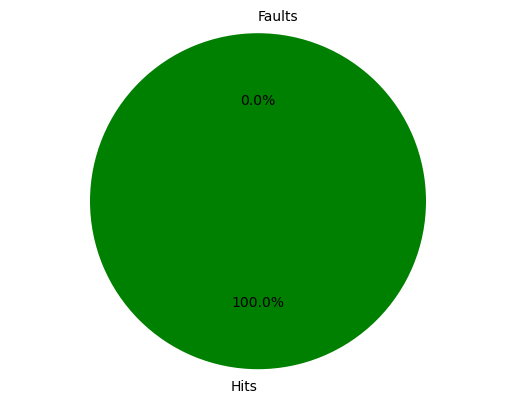

In [141]:
graph=[hits,faults]
labels = 'Hits', 'Faults';
sizes = [96.5, 3.3]
explode = (0, 0.14)

fig1, ax1 = plt.subplots();
ax1.pie(graph,colors=['green','red'],labels=labels, autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

#### Thus, this model has an accuracy of 100%, which is significantly higher than the whitebox version. 

These improvements could be due to the better suited loss function used here- here, we've used a categorical cross entropy function which is better than mean squared error for a classification problem. 

We've also used a softmax activation function in the output layer, which was not done for the whitebox implementation. 

#### Here, we get 100% accuracy only because the dataset is very small- this would not be possible in real life applications